<a href="https://colab.research.google.com/github/AfsanehShamsaddini/California-Housing-Prices/blob/main/California_Housing_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install missingno

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error

## Data Collection & Processing

In [2]:
#  Load the data from csv fole to Pandas Dataframe
data = pd.read_csv('/content/drive/MyDrive/ML/california/housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
# Numbers of rows and columns
data.shape

(20640, 10)

In [4]:
# Getting some information about data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
# Understanding memory usage
data.memory_usage()

,0
Index,132
longitude,165120
latitude,165120
housing_median_age,165120
total_rooms,165120
total_bedrooms,165120
population,165120
households,165120
median_income,165120
median_house_value,165120


## Detecting Mixed Types

In [6]:
def detect_mixed_data(df):
  mixed_data = {}
  for column in df.columns:
    types = df[column].apply(lambda x: type(x).__name__).value_counts()
    if len(types) > 1:
       mixed_data[column] = types.to_dict()

  return mixed_data


In [7]:
mixed_columns = detect_mixed_data(data)
print("Columns with mixed types:", mixed_columns)

Columns with mixed types: {}


In [8]:
# Getting some statistical measures about the data
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [9]:
data['ocean_proximity'].value_counts()

,count
ocean_proximity,
<1H OCEAN,9136
INLAND,6551
NEAR OCEAN,2658
NEAR BAY,2290
ISLAND,5


<Axes: xlabel='ocean_proximity', ylabel='count'>

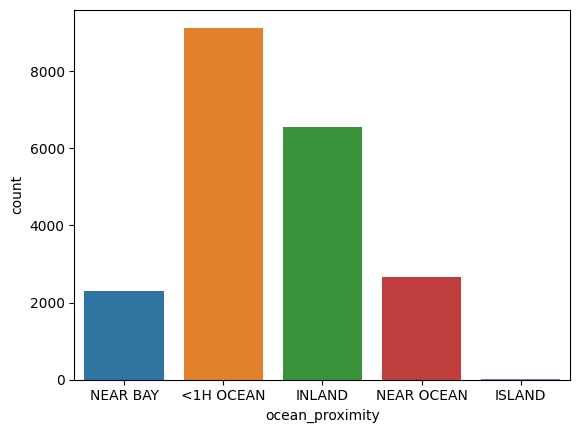

In [10]:
# Making a count plot for "ocean_proximity" column
sns.countplot(x = 'ocean_proximity', data = data, hue = 'ocean_proximity')

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

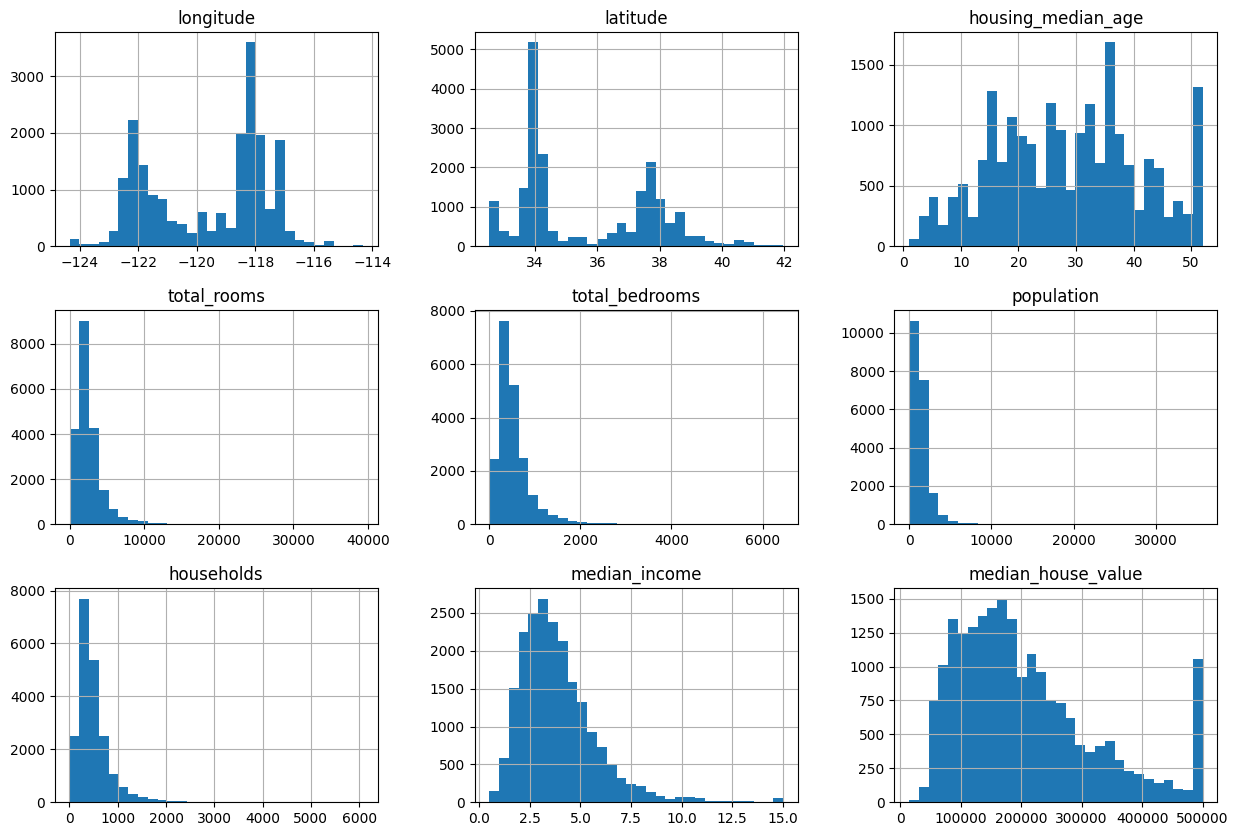

In [11]:
data.hist(bins = 30, figsize=(15, 10))


From above histograms it's clear that most of the features are skewed. It seems that housing_median_age and median_housing_value have been capped a the end (Peak at the end).

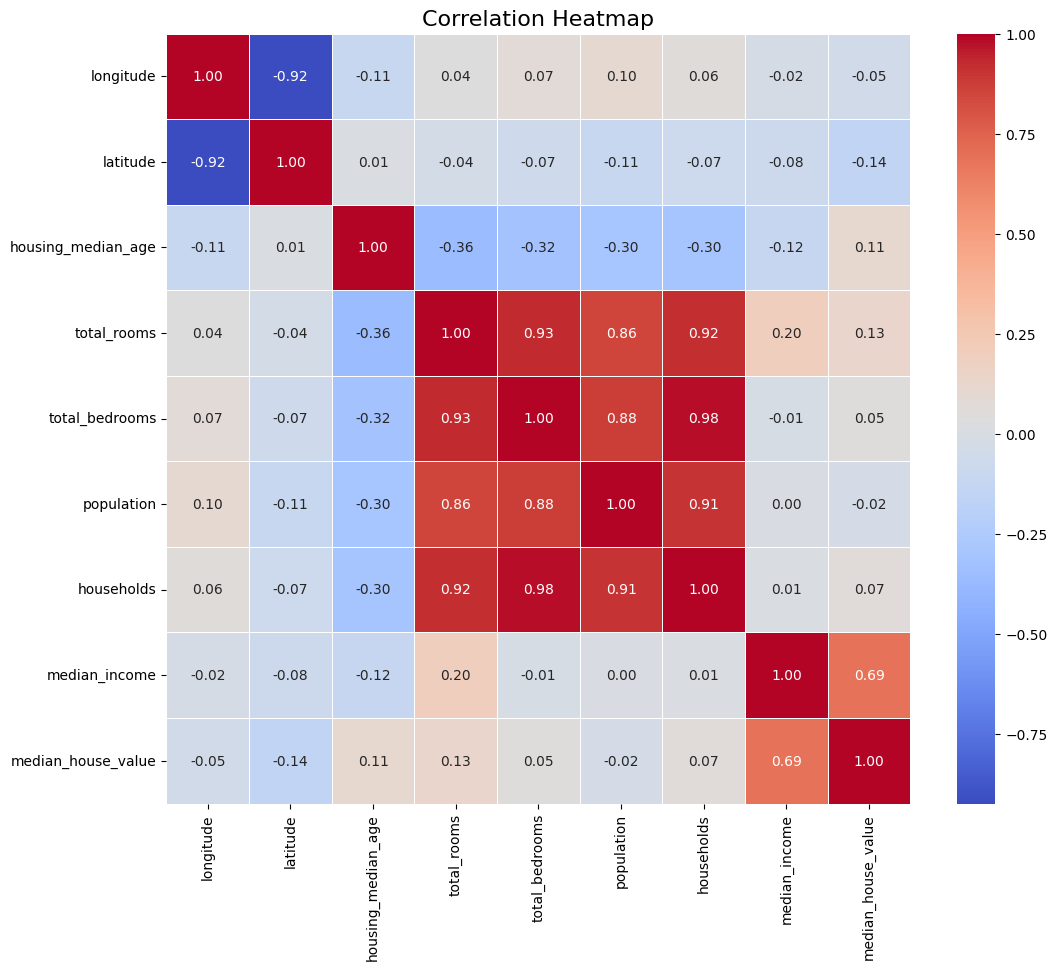

In [14]:
# Create a heatmap to visualize the correlation matrix
# Drop the non-numeric 'ocean_proximity' column before calculating correlation
plt.figure(figsize=(12, 10))
sns.heatmap(data.drop('ocean_proximity', axis=1).corr(), annot=True, cmap='coolwarm', fmt = '.2f', linewidths=.5)
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

## Handling Missing Data

Text(0.5, 1.0, 'Matrix Plot of Missing Values')

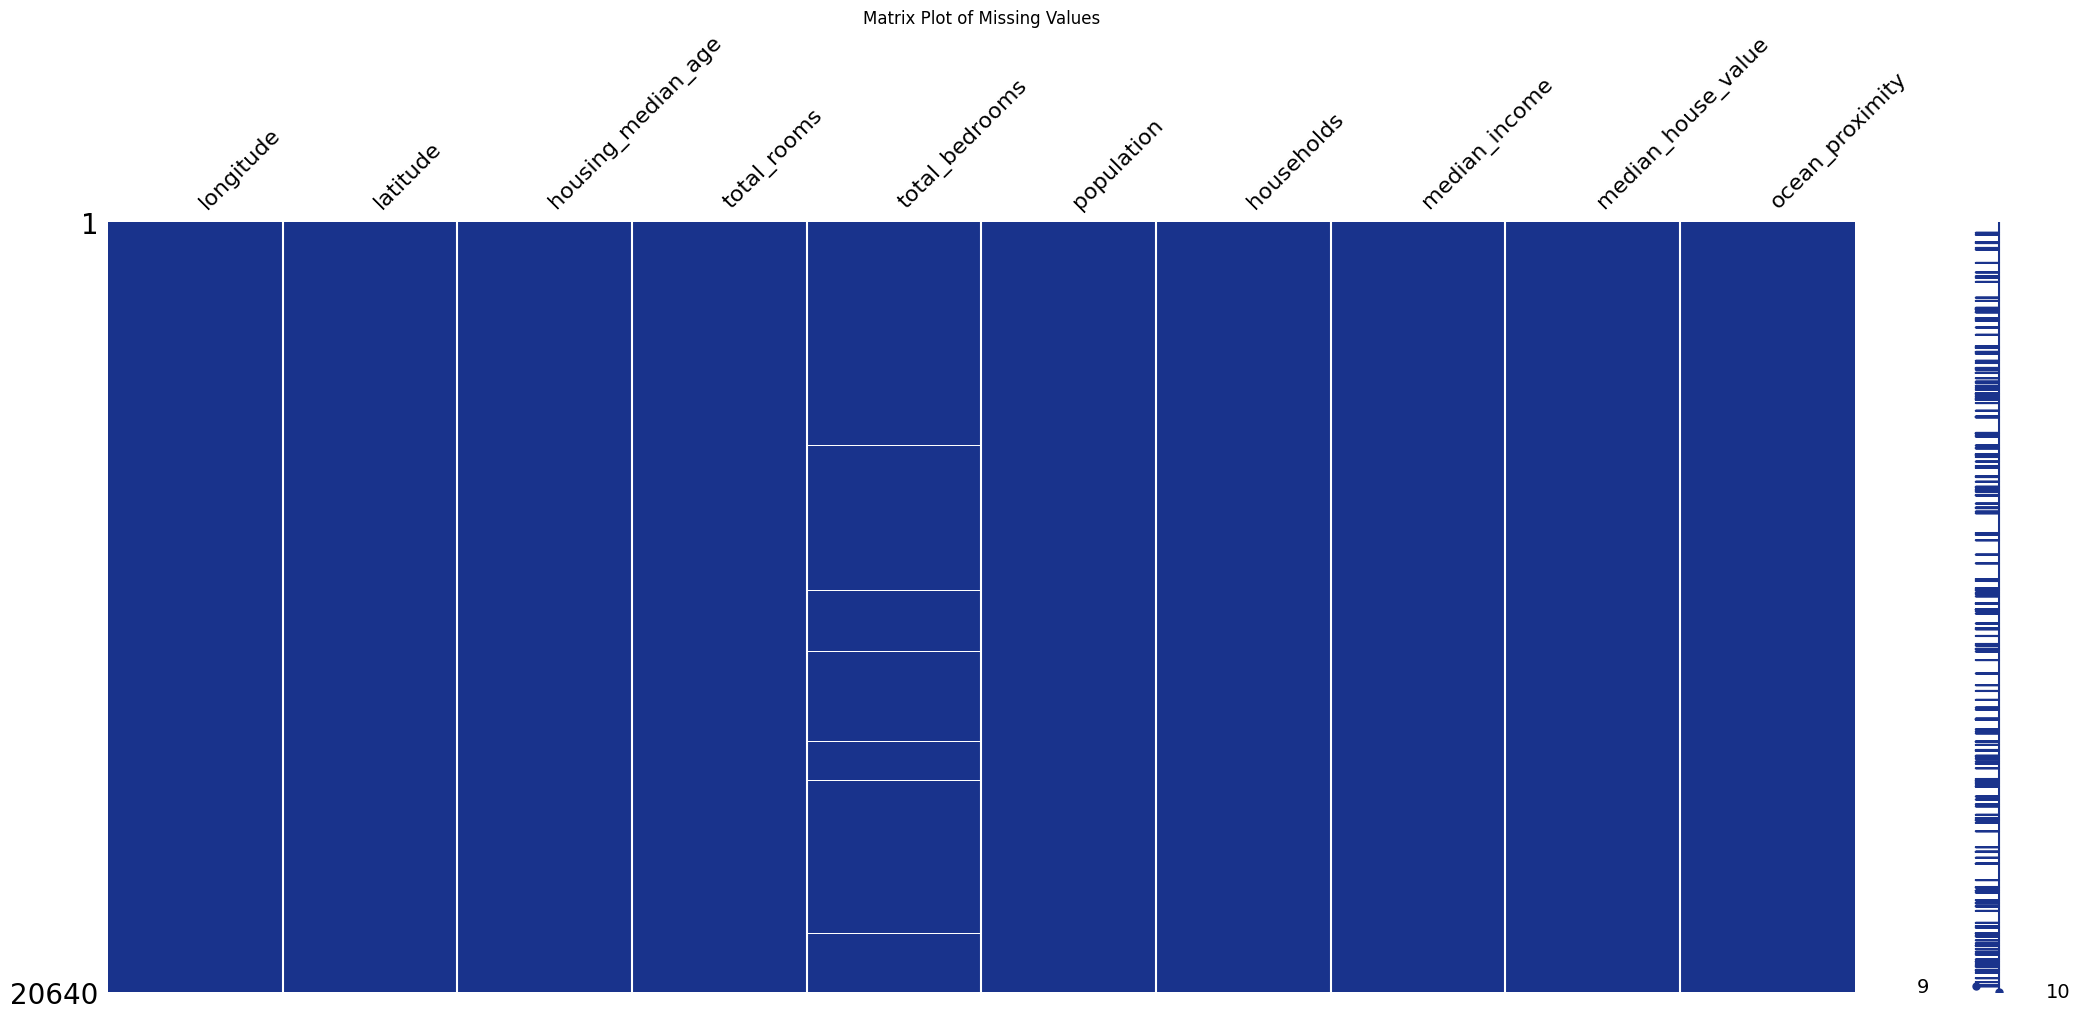

In [22]:
msno.matrix(data, color=(0.10,0.20,0.55))
plt.title('Matrix Plot of Missing Values')

<Axes: >

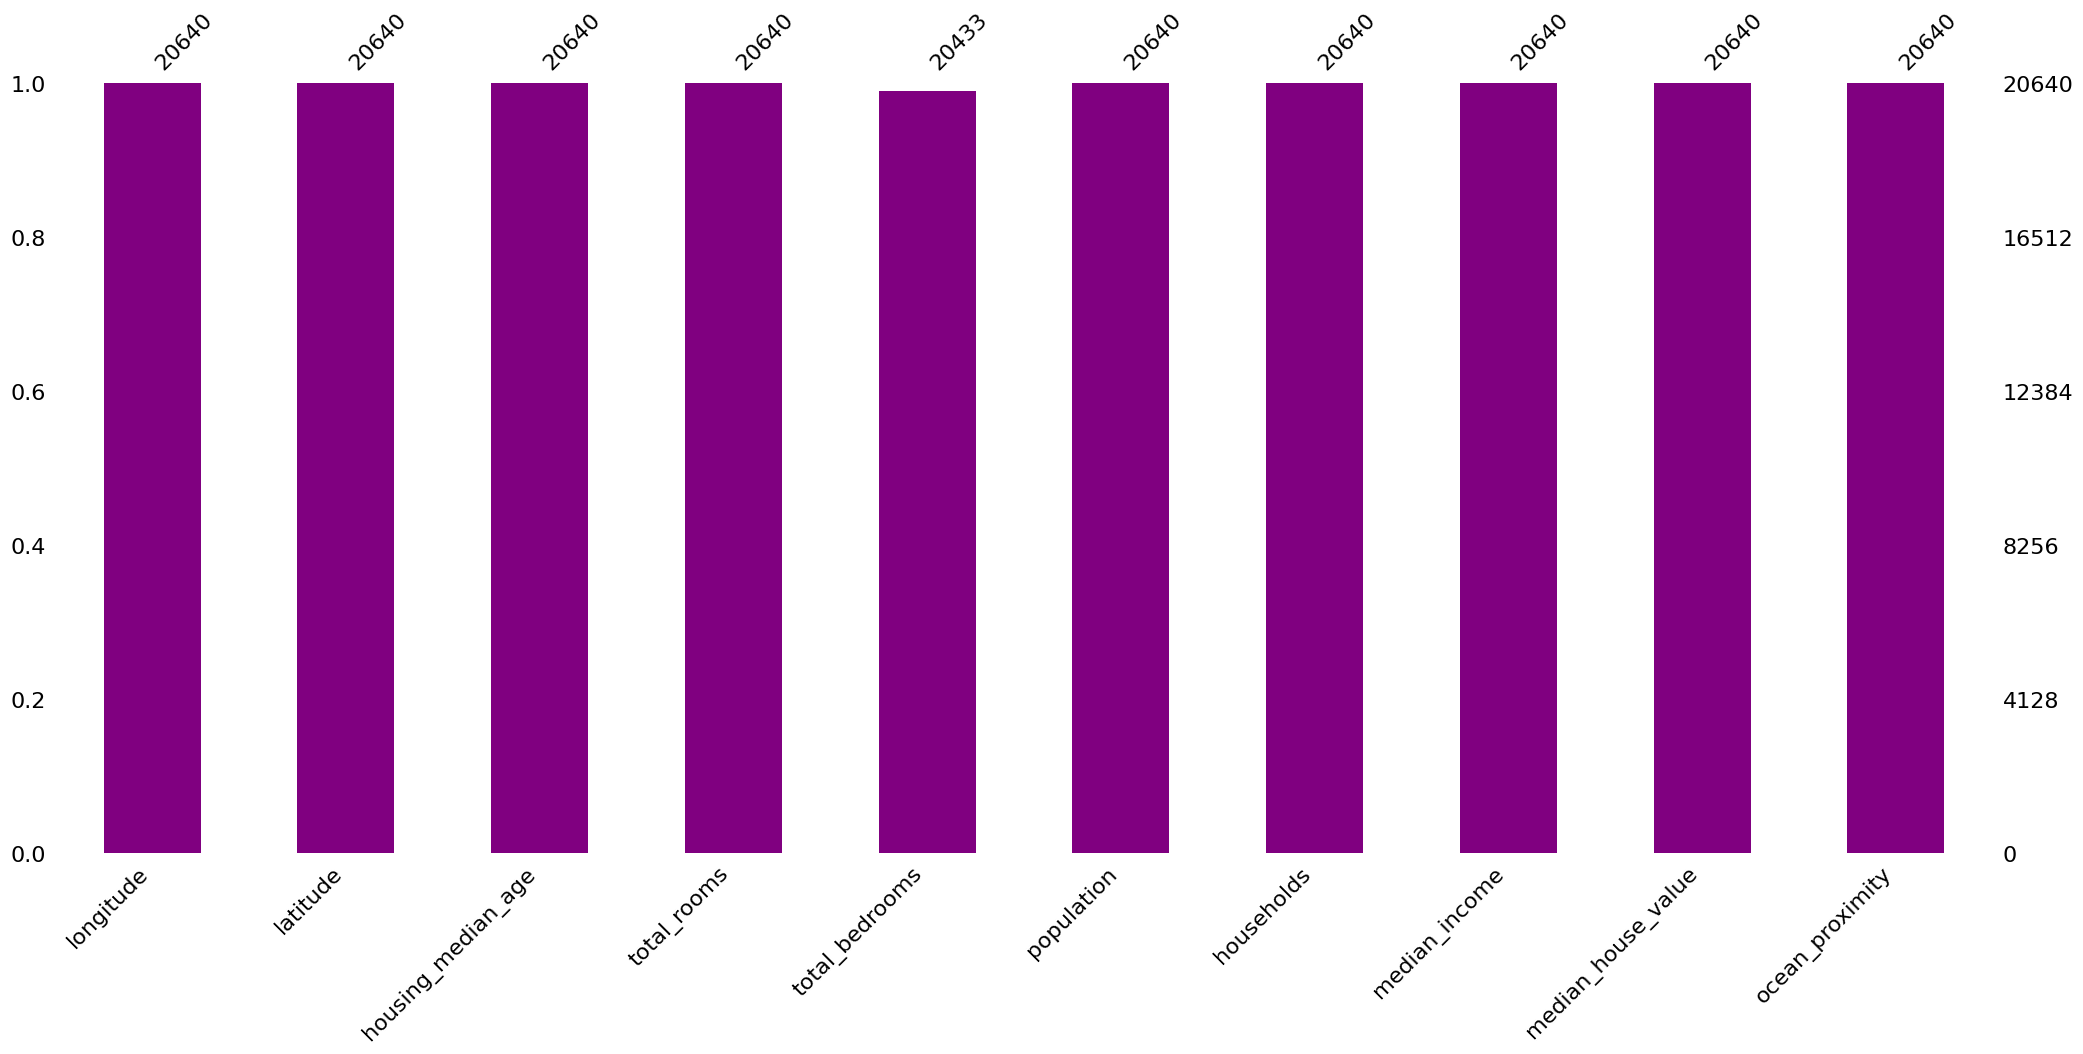

In [24]:
msno.bar(data, color='purple')

In [25]:
# Check the number of missing values in each column
missing_count = data.isnull().sum()

# Calculate percentage of missing values
missing_percentages = 100 * data.isnull().sum() / len(data)

# Combine counts and percentages in a single dataframe
missing_table = pd.concat(
    [missing_count, missing_percentages],
    axis=1,
    keys=['missing_count',' missing_percentages'],
)

missing_table


,missing_count,missing_percentages
longitude,0,0.000000
latitude,0,0.000000
housing_median_age,0,0.000000
total_rooms,0,0.000000
total_bedrooms,207,1.002907
population,0,0.000000
households,0,0.000000
median_income,0,0.000000
median_house_value,0,0.000000
ocean_proximity,0,0.000000


In [27]:
#  Replasing the missing values in "total_bedrooms" column with mean value
data['total_bedrooms'] = data['total_bedrooms'].fillna(data['total_bedrooms'].median())

In [29]:
data.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0
ocean_proximity,0


## Removing outliers

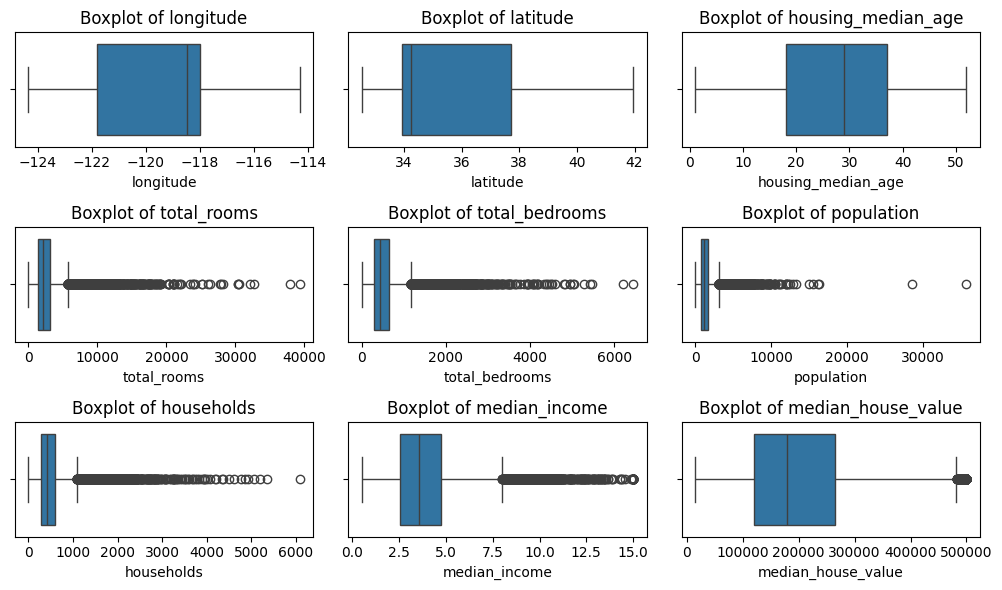

In [40]:
# Create boxplots for each numerical column to visualize outliers
fig, axe = plt.subplots(3, 3, figsize = (10, 6))
axe = axe.flatten()

for i, column in enumerate(data.columns):
  if data[column].dtype in ['int64', 'float64']:
    sns.boxplot(x=data[column], ax=axe[i])
    axe[i].set_title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()